In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np

In [26]:
np.random.seed(42)

In [27]:
mnist = fetch_mldata('MNIST original', data_home='/datasets/mnist_dataset/')

In [28]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [29]:
X,y=mnist['data'],mnist['target']

In [30]:
X.shape

(70000, 784)

In [31]:
y.shape

(70000,)

In [32]:
type(X)

numpy.ndarray

In [33]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

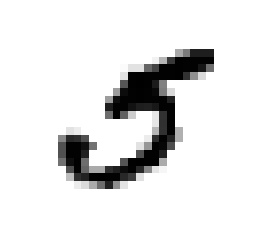

In [34]:
some_digit=X[36000]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [35]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [36]:
shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

In [37]:
shuffle_index

array([12628, 37730, 39991, ...,   860, 15795, 56422])

In [38]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [39]:
y_train_5

array([False, False, False, ..., False, False, False], dtype=bool)

In [40]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [41]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [42]:
X_train.shape

(60000, 784)

In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [44]:
skfolds=StratifiedKFold(n_splits=3,random_state=42)

In [45]:
for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_fold=X_train[train_index]
    y_train_fold=(y_train_5[train_index])
    X_test_fold=X_train[test_index]
    y_test_fold=(y_train_5[test_index])
    print(train_index)
    clone_clf.fit(X_train_fold,y_train_fold)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

[19844 19852 19878 ..., 59997 59998 59999]
0.9502
[    0     1     2 ..., 59997 59998 59999]
0.96565
[    0     1     2 ..., 40065 40066 40067]
0.96495


In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([ 0.9502 ,  0.96565,  0.96495])

In [48]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

In [51]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.76871350203503808

In [52]:
recall_score(y_train_5, y_train_pred)

0.80132816823464303

In [53]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.78468208092485547

In [54]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([ 161855.74572176])

In [55]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [56]:
y_scores

array([ -434076.49813641, -1825667.15281624,  -767086.76186905, ...,
        -867191.25267994,  -565357.11420164,  -366599.16018198])

In [64]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [65]:
thresholds

array([-1613405.71147769, -1612415.64410228, -1611701.37464018, ...,
         954170.04762499,   987947.69103863,  1002862.09359785])

In [70]:
def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.xlabel("Thresholds",fontsize=16)
    plt.legend(loc="upper left",fontsize=16)
    plt.xlim([-700000,700000])
    plt.ylim([0,1])

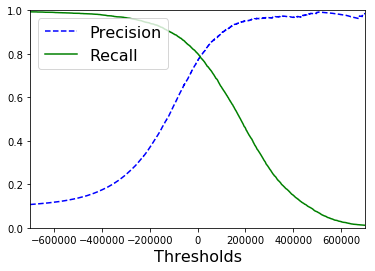

In [71]:
plot_precision_recall_vs_thresholds(precisions,recalls,thresholds)
plt.show()

In [72]:
y_train_pred_90=(y_scores>70000)

In [73]:
precision_score(y_train_5,y_train_pred_90)

0.86592051164915484

In [74]:
recall_score(y_train_5, y_train_pred_90)

0.69931746910164172

In [75]:
from sklearn.metrics import roc_curve

In [76]:
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

In [79]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Postive Rate',fontsize=16)
    

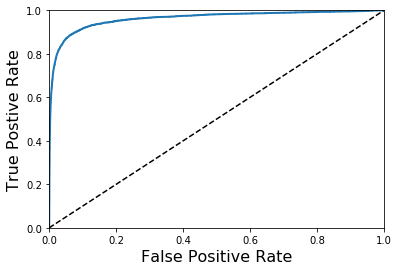

In [80]:
plot_roc_curve(fpr,tpr)

In [81]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.96244965559671547

In [91]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [92]:
y_probas_forest

array([[ 1. ,  0. ],
       [ 0.9,  0.1],
       [ 1. ,  0. ],
       ..., 
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ]])

In [94]:
y_scores_forest=y_probas_forest[:,1]

In [95]:
y_scores_forest

array([ 0. ,  0.1,  0. , ...,  0. ,  0. ,  0. ])

In [96]:
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

C:\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))


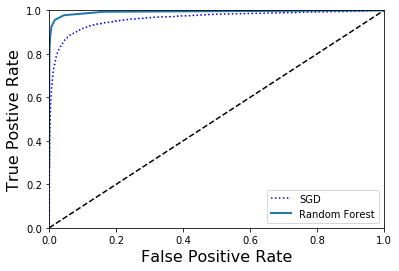

In [97]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()

In [98]:
roc_auc_score(y_train_5,y_scores_forest)

0.99312433660038291

In [99]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [100]:
some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [101]:
np.argmax(some_digit_scores)

5

In [102]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [106]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [107]:
len(ovo_clf.estimators_)

45

In [109]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [110]:
forest_clf.predict_proba([some_digit])

array([[ 0.1,  0. ,  0. ,  0.1,  0. ,  0.8,  0. ,  0. ,  0. ,  0. ]])

In [111]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([ 0.84063187,  0.84899245,  0.86652998])

In [114]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

array([ 0.91011798,  0.90874544,  0.906636  ])

In [117]:
X_train_scaled[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00441808, -0.00575482, -0.00408252,
       -0.00408252,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00408252, -0.00470969, -0.00879935,
       -0.01159056, -0.01475898, -0.01928485, -0.0246718 , -0.02907103,
       -0.03059266, -0.03116401, -0.03196287, -0.03020254, -0.03131022,
       -0.0283834 , -0.02311919, -0.01916663, -0.0167723 , -0.01099636,
       -0.00832486, -0.00438069,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.00408252, -0.00539535,
       -0.00852241, -0.01198504, -0.01765348, -0.0277109 , -0.03702009,
       -0.05215128, -0.0670362 , -0.08301705, -0.0993793 , -0.11

In [119]:
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)

In [120]:
y_train_pred

array([ 1.,  6.,  6., ...,  0.,  2.,  9.])

In [121]:
conf_mx

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]])

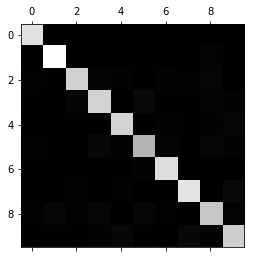

In [122]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

In [123]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

In [125]:
norm_conf_mx

array([[  9.66570994e-01,   5.06500084e-04,   4.05200068e-03,
          1.51950025e-03,   1.68833361e-03,   8.27283471e-03,
          8.44166807e-03,   1.68833361e-03,   6.58450110e-03,
          6.75333446e-04],
       [  2.96647879e-04,   9.63067339e-01,   6.37792940e-03,
          3.70809849e-03,   1.03826758e-03,   5.93295758e-03,
          7.41619697e-04,   1.48323939e-03,   1.61673094e-02,
          1.18659152e-03],
       [  8.55991944e-03,   6.88150386e-03,   8.93084928e-01,
          1.74555220e-02,   1.49378986e-02,   4.36388050e-03,
          1.46022155e-02,   1.00704935e-02,   2.78616986e-02,
          2.18194025e-03],
       [  7.66595988e-03,   7.50285435e-03,   2.29978796e-02,
          8.71309737e-01,   1.63105529e-04,   3.76773773e-02,
          6.52422117e-03,   8.15527646e-03,   2.29978796e-02,
          1.50057087e-02],
       [  3.25231085e-03,   4.96405341e-03,   7.01814447e-03,
          1.71174255e-03,   9.18521054e-01,   1.54056830e-03,
          9.58575830e-03

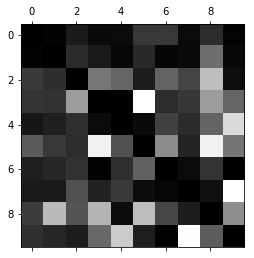

In [126]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [128]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]

In [129]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ..., 
       [False, False],
       [False, False],
       [ True,  True]], dtype=bool)

In [130]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [131]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [132]:
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_train,cv=3)
f1_score(y_train,y_train_knn_pred,average="macro")

0.96845540180280221

In [139]:
noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise

In [140]:
y_train_mod=X_train
y_test_mod=X_test

In [143]:
some_index = 5500
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])


In [144]:
clean_digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0